In [15]:
import numpy as np
import matplotlib.pyplot as plt

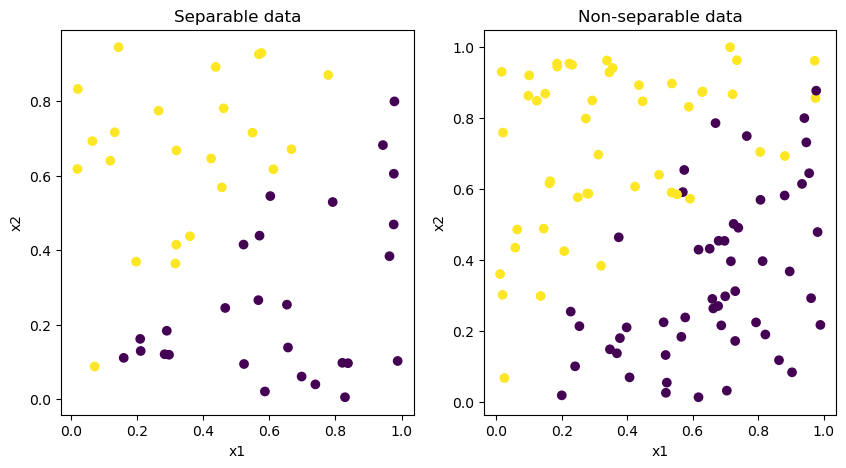

In [16]:
# 2. Classification with a Linear Function (Perceptron)

## 2.1 Data Generation (Similar to Fig. 18.15)

# Separable Data (Fig. 18.15a)
np.random.seed(0)
X_separable = np.random.rand(50, 2)  # 2 features
y_separable = np.array([1 if x[1] > x[0] else 0 for x in X_separable])


# Non-separable Data (Fig. 18.15b - add some overlap)

X_nonseparable = np.random.rand(100, 2) 
y_nonseparable = np.array([1 if x[1] > x[0] + np.random.uniform(-0.2, 0.2) else 0 for x in X_nonseparable])



# Plotting the separable and non separable data

plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.scatter(X_separable[:, 0], X_separable[:, 1], c=y_separable, cmap='viridis', label='Data points')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Separable data')



plt.subplot(1, 2, 2)
plt.scatter(X_nonseparable[:, 0], X_nonseparable[:, 1], c=y_nonseparable, cmap='viridis', label='Data points')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Non-separable data')
plt.show()

In [17]:
## 2.2 Perceptron Algorithm

def perceptron(X, y, learning_rate, n_iterations):
    X = np.insert(X, 0, 1, axis=1)  # Add bias term (x0 = 1)
    w = np.zeros(X.shape[1])
    accuracy_history = []

    for _ in range(n_iterations):
        n_correct = 0
        for i in range(len(X)):  # Loop through examples one at a time
            y_hat = 1 if np.dot(w, X[i]) >= 0 else 0
            w = w + learning_rate * (y[i] - y_hat) * X[i]  # Perceptron learning rule

            if y_hat==y[i]:
                n_correct += 1

        accuracy = n_correct / len(X)
        accuracy_history.append(accuracy)


    return w, accuracy_history

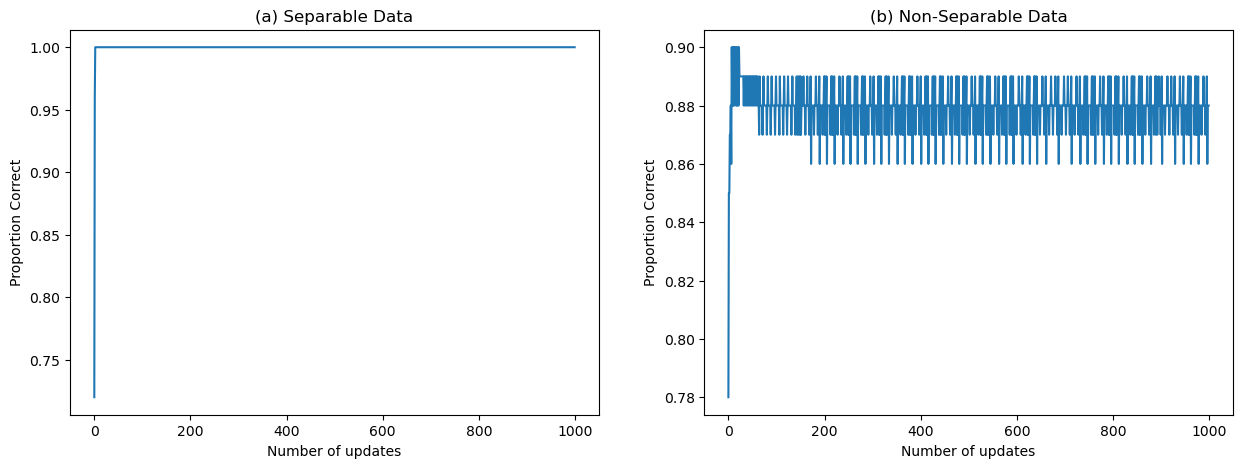

In [18]:
## 2.3 Training and Visualization (Fig. 18.16)


learning_rate = 0.1
n_iterations = 1000


# Train on Separable data
w_separable, accuracy_history_separable = perceptron(X_separable, y_separable, learning_rate, n_iterations)

# Train on Non separable data
w_nonseparable, accuracy_history_nonseparable = perceptron(X_nonseparable, y_nonseparable, learning_rate, n_iterations)





# Plot Fig. 18.16 (a), (b)
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(accuracy_history_separable)
plt.xlabel('Number of updates')
plt.ylabel('Proportion Correct')
plt.title('(a) Separable Data')

plt.subplot(1, 2, 2)
plt.plot(accuracy_history_nonseparable)
plt.xlabel('Number of updates')
plt.ylabel('Proportion Correct')
plt.title('(b) Non-Separable Data')

plt.show()

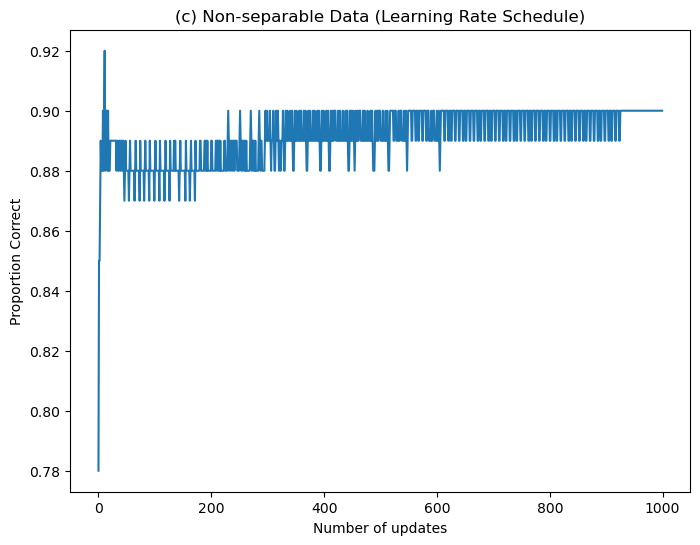

In [19]:
## 2.4 Learning Rate Schedule (Fig. 18.16c)

def perceptron_with_schedule(X, y, initial_learning_rate, n_iterations):
    X = np.insert(X, 0, 1, axis=1)
    w = np.zeros(X.shape[1])
    accuracy_history = []

    for t in range(n_iterations):
        n_correct = 0
        learning_rate = initial_learning_rate / (initial_learning_rate + t) # Learning rate schedule

        for i in range(len(X)):

            y_hat = 1 if np.dot(w, X[i]) >= 0 else 0
            w = w + learning_rate * (y[i] - y_hat) * X[i]

            if y_hat==y[i]:
                n_correct += 1
        accuracy = n_correct/len(X)

        accuracy_history.append(accuracy)

    return w, accuracy_history

# Train with learning rate schedule
initial_learning_rate = 1000
w_schedule, accuracy_history_schedule = perceptron_with_schedule(X_nonseparable, y_nonseparable, initial_learning_rate, n_iterations)



# Plot Fig. 18.16 (c)
plt.figure(figsize=(8,6))
plt.plot(accuracy_history_schedule)
plt.xlabel("Number of updates")
plt.ylabel("Proportion Correct")
plt.title("(c) Non-separable Data (Learning Rate Schedule)")
plt.show()

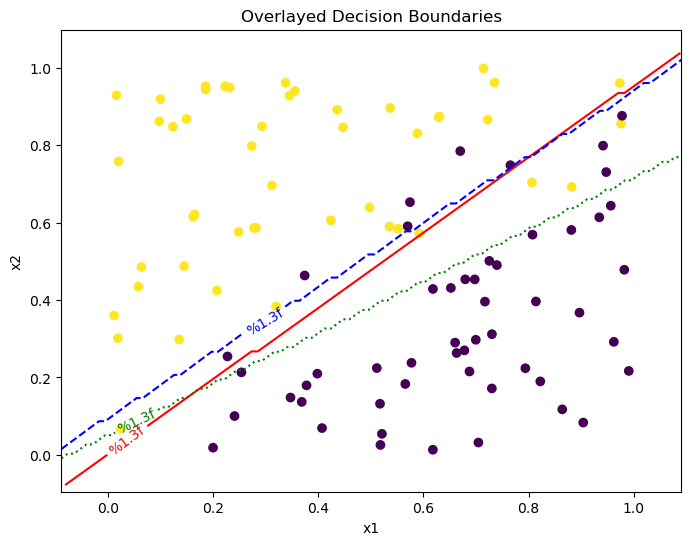

In [24]:
def plot_overlayed_decision_boundaries(X_separable, y_separable, w_separable, X_nonseparable, y_nonseparable, w_nonseparable, w_schedule):
    fig, ax = plt.subplots(1, 1, figsize=(8, 6))

    datasets = [(X_separable, w_separable, 'red', 'solid', "Separable"),
                (X_nonseparable, w_nonseparable, 'blue', 'dashed', "Non-Separable"),
                (X_nonseparable, w_schedule, 'green', 'dotted', "Non-Sep. (Sched.)")]

    ax.scatter(X_nonseparable[:, 0], X_nonseparable[:, 1], c=y_nonseparable, cmap='viridis')

    for X, w, color, linestyle, label in datasets:
        x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
        y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100)) # Re-added these lines!
        X_grid = np.c_[xx.ravel(), yy.ravel()]
        X_grid_with_bias = np.insert(X_grid, 0, 1, axis=1)
        Z = np.dot(X_grid_with_bias, w) >= 0  # Re-added this line!
        Z = Z.reshape(xx.shape)             # Re-added this line!

        CS = ax.contour(xx, yy, Z, colors=[color], linestyles=[linestyle])
        ax.clabel(CS, inline=1, fontsize=10, fmt={1.0: label})

    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_title('Overlayed Decision Boundaries')

    plt.show()


# ... After you've trained your perceptrons (w_separable, w_nonseparable, w_schedule):
plot_overlayed_decision_boundaries(X_separable, y_separable, w_separable, X_nonseparable, y_nonseparable, w_nonseparable, w_schedule)